In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load json to memory from file
def get_source_json(filename):
    directory = os.path.join(os.path.pardir, "data", filename)
    with open(directory, "r", encoding="utf-8") as f:
        json_file = json.load(f)
    return json_file
result_info = get_source_json("parser_result_info.json")["RECORDS"]
len(result_info)
gold_adv = [int(e) for e in result_info[0]["radiant_gold_adv"].strip("[]").split(", ")]
sum_gold_adv = sum(gold_adv)
print(gold_adv[0], sum_gold_adv)

-136 -44142


In [25]:
# 计算 win_rate
def get_win_rate(start_time, end_time, result_info):
    win_rate = []
    for match in result_info:
        gold_adv = [int(e) for e in match["radiant_gold_adv"].strip("[]").split(", ")]
        xp_adv = [int(e) for e in match["radiant_xp_adv"].strip("[]").split(", ")]
        end = end_time if (end_time < len(gold_adv)) else len(gold_adv)
        win_rate.append(sum(gold_adv[start_time:end]) * 0.5 + sum(xp_adv[start_time:end]) * 0.5)
    return win_rate

In [26]:
win_rate = get_win_rate(0, 120 , result_info)
print(win_rate[0:10], "\n", len(win_rate))

[-43316.5, 172663.5, -304590.0, -124158.0, 457990.0, -261662.0, 12781.0, 340032.5, -239591.5, -118922.0] 
 5387


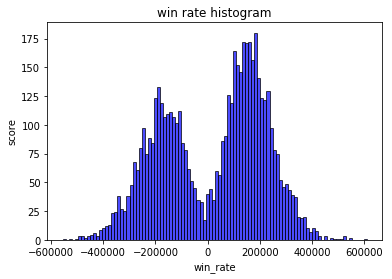

In [27]:
plt.hist(win_rate, bins=100, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("win_rate")
plt.ylabel("score")
plt.title("win rate histogram")
plt.show()

In [28]:
detail_info = get_source_json("parser_detail_info.json")["RECORDS"]

In [29]:
len(detail_info)

5387

In [34]:
hero_winrate = {}
for match in detail_info:
    # key is string of match_id 
    hero_winrate[str(match["match_id"])] = [match["hero_id"].strip("[]")]
print(len(hero_winrate), hero_winrate["3790506903"])
for match in result_info:
    key = str(match["match_id"])
    if key in hero_winrate:
        hero_winrate[key].append(match["radiant_gold_adv"].strip("[]"))
        hero_winrate[key].append(match["radiant_xp_adv"].strip("[]"))
print(len(hero_winrate), list(map(int, hero_winrate["3790506903"][1].split(", "))))

5387 ['16, 17, 99, 112, 81, 47, 119, 77, 57, 100']
5387 [-136, -353, -27, 687, 1523, 1352, 1354, 1528, 801, 1051, 1075, 2147, 1926, 2300, 2018, 2020, 1492, 624, -138, -2370, -5147, -7607, -9708, -16372, -24182]


In [35]:
def cal_win_rate(start_time, end_time, gold_adv, xp_adv):
    end_time = end_time if (end_time < len(gold_adv)) else len(gold_adv)
    return sum(gold_adv[start_time:end_time]) * 0.5 + sum(xp_adv[start_time:end_time]) * 0.5

data = []
label = []
for key, value in hero_winrate.items():
    data.append(value[0].split(", "))
    label.append(cal_win_rate(0, 12, list(map(int, value[1].split(", "))), list(map(int, value[2].split(", ")))))
print(data[0], label[0])
x_sdata = np.array(data)
y_sdata = np.array(label)
x_sdata = x_sdata.astype(int)
# y_train = y_train.astype(int)
print(x_sdata.shape, y_sdata.shape)

['16', '17', '99', '112', '81', '47', '119', '77', '57', '100'] 8270.5
(5387, 10) (5387,)
